# Demonstration of RCCR on simulated data

In [4]:
import sys

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import OneHotEncoder


sys.path.append('../src')

plt.rcParams.update(plt.rcParamsDefault)

import rccr

Generate simulated data

Case Study #1


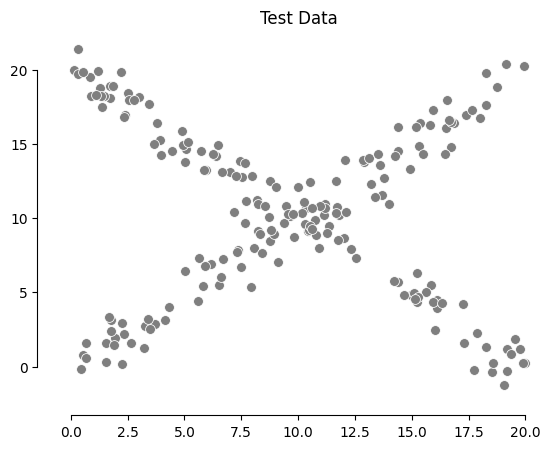

In [5]:
print('Case Study #1')
np.random.seed(25)
n = 100
x1 = np.random.uniform(0, 20, size=n)
x2 = np.random.uniform(0, 20, size=n)
y1 = x1 + np.random.normal(size=n)
y2 = 20 -x2 + np.random.normal(size=n)
x = np.concatenate([x1, x2])
y = np.concatenate([y1, y2])
data = np.vstack([x, y]).T
sns.scatterplot(x=x, y=y, color='tab:grey', s=50, alpha=1)
sns.despine(offset=10, trim=True)
plt.title('Test Data')
plt.show()




obtain clusters from kmeans or RCCR

In [ ]:
kmeans_clusterer = KMeans(n_clusters=2).fit(np.transpose(np.vstack((x,y))))
kmeans_labels = kmeans_clusterer.labels_

rccr_labels = rccr.get_average_clusters(x.reshape(-1,1),y, n_clusters=2, iterations=16,max_iteration_cluster=5, plot=False)

all_possible_labels = rccr.get_possible_clusters(x.reshape(-1,1),y,labels=rccr_labels,scoring='MAE')


rccr_labels_array = OneHotEncoder(sparse=False).fit_transform(rccr_labels.reshape(-1,1))

rccr_labels_multiple_possibilities = rccr_labels_array+all_possible_labels

rccr_labels_multiple_possibilities[rccr_labels_multiple_possibilities==2] = 1

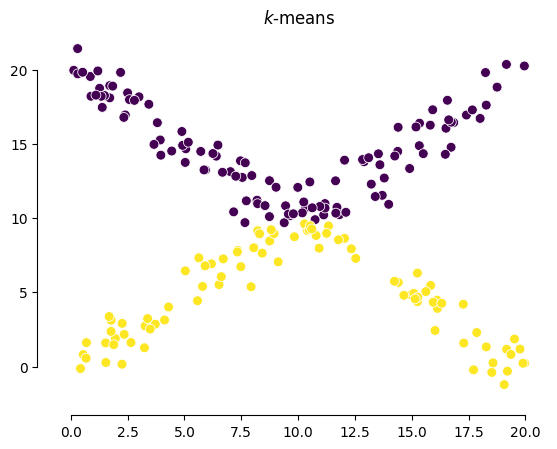

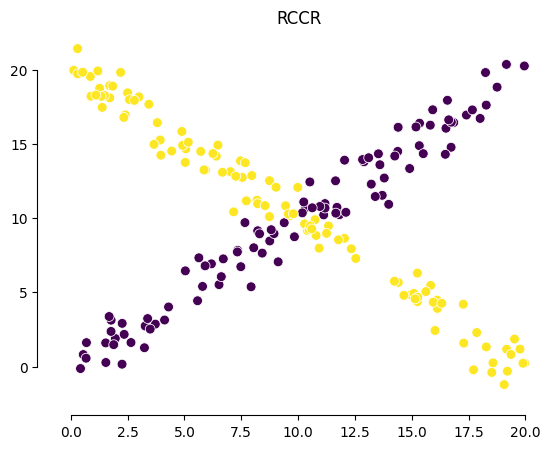

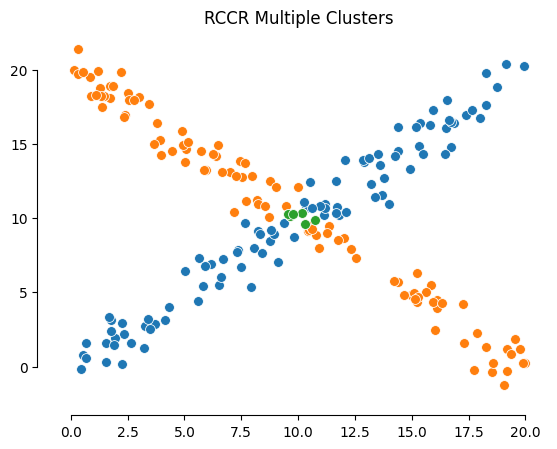

In [7]:
sns.scatterplot(x=x, y=y, c=kmeans_labels, s=50, alpha=1)
sns.despine(offset=10, trim=True)
plt.title('$\\it{k}$-means')
plt.show()

sns.scatterplot(x=x, y=y, c=rccr_labels, s=50, alpha=1)
sns.despine(offset=10, trim=True)
plt.title('RCCR')
plt.show()

indx0 = rccr_labels_multiple_possibilities[:,0] == 1
indx1 = rccr_labels_multiple_possibilities[:,1] == 1
indx2 = np.add(rccr_labels_multiple_possibilities[:,0],rccr_labels_multiple_possibilities[:,1]) == 2
sns.scatterplot(x=x[indx0], y=y[indx0], s=50, alpha=1)
sns.scatterplot(x=x[indx1], y=y[indx1], s=50, alpha=1)
sns.scatterplot(x=x[indx2], y=y[indx2], s=50, alpha=1)
sns.despine(offset=10, trim=True)
plt.title('RCCR Multiple Clusters')
plt.show()

Case Study #2

Case Study #2


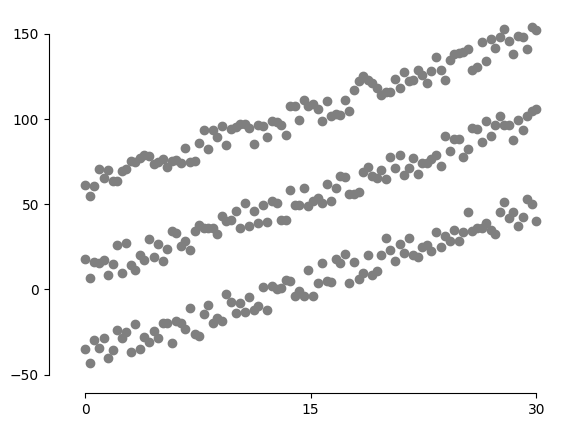

In [8]:
print('Case Study #2')

x  = np.linspace(0, 30, 100)
y1 = 3*x -50 + 20*np.random.random(size=len(x))
y2 = 3*x -0 + 20*np.random.random(size=len(x))
y3 = 3*x +50 + 20*np.random.random(size=len(x))

x_final = np.concatenate((x,x,x))
y_final = np.concatenate((y1,y2,y3))
combined = np.transpose(np.vstack((y_final,x_final)))

plt.scatter(x=combined[:,1], y=combined[:,0], color='tab:grey')
plt.xticks([0,15,30])
plt.yticks([-50,0,50,100, 150])
sns.despine(offset=10, trim=True)
plt.show()


get labels

In [9]:
kmeans_clusterer = KMeans(n_clusters=3).fit(combined)
kmeans_labels = kmeans_clusterer.labels_

rccr_labels = labels = rccr.get_average_clusters(x_final.reshape(-1,1),y_final, n_clusters=3, iterations=16,max_iteration_cluster=5, plot=False)

Initial r2 0.04301967285185778
Initial r2 0.04301967285185778
Initial r2 0.04301967285185778
Initial r2 0.04301967285185778
Iteration 0 0.7133584878343289
Iteration 0 0.7246302591469834
Iteration 0 0.5213026654573062
Iteration 0 0.7271416026245504
Iteration 1 0.8155789753744069
Iteration 1 0.8683734454172237
Iteration 1 0.8254377727416579
Iteration 1 0.8457690458894676
Iteration 2 0.8166885189930867
Iteration 2 0.8295681054105266
Iteration 2 0.9332938886895513
Iteration 2 0.9079727863385564
Iteration 3 0.8186233302251504
Iteration 3 0.9590962945156057
Iteration 3 0.8337216582055857
Iteration 3 0.9590962945156057
Final r2 0.8234836675232509
Final r2 0.9590962945156057
Final r2 0.8654614081919042
Final r2 0.9590962945156057
Initial r2 0.04301967285185778
Initial r2 0.04301967285185778
Initial r2 0.04301967285185778
Initial r2 0.04301967285185778
Iteration 0 0.7486046186138089
Iteration 0 0.7831929924745186
Iteration 0 0.7609132746761903
Iteration 0 0.7399328645200649
Iteration 1 0.836104

Case Study #2


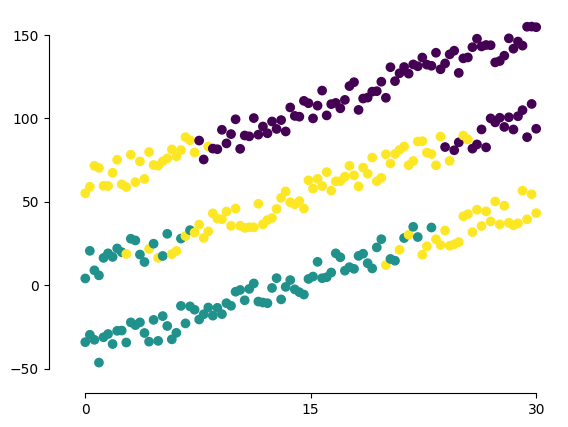

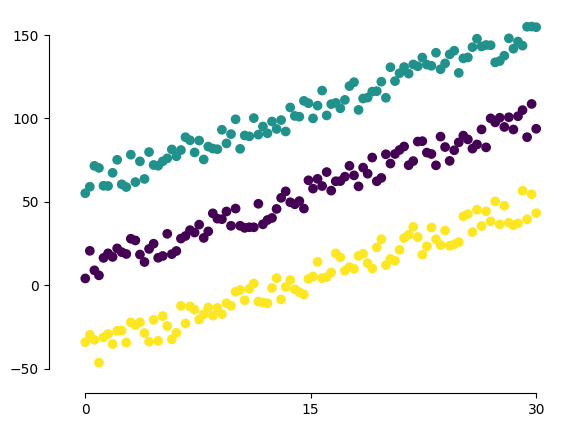

In [10]:
print('Case Study #2')

x  = np.linspace(0, 30, 100)
y1 = 3*x -50 + 20*np.random.random(size=len(x))
y2 = 3*x -0 + 20*np.random.random(size=len(x))
y3 = 3*x +50 + 20*np.random.random(size=len(x))

x_final = np.concatenate((x,x,x))
y_final = np.concatenate((y1,y2,y3))
combined = np.transpose(np.vstack((y_final,x_final)))

plt.scatter(x=combined[:,1], y=combined[:,0], c=kmeans_labels)
plt.xticks([0,15,30])
plt.yticks([-50,0,50,100, 150])
sns.despine(offset=10, trim=True)
# plt.title('$\\it{k}$-means')
plt.show()


plt.scatter(x=combined[:,1], y=combined[:,0], c=rccr_labels)
plt.xticks([0,15,30])
plt.yticks([-50,0,50,100, 150])
sns.despine(offset=10, trim=True)
# plt.title('RCCR')
plt.show()
